In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl




In [27]:
from sklearn.datasets import load_diabetes
# Load the diabetes dataset
diabetes = load_diabetes()

# Create a DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

X = diabetes_df

# Add the target variable to the DataFrame
diabetes_df['target'] = diabetes.target

Y = diabetes_df['target']

# Display the DataFrame
display(diabetes_df.head())


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [28]:
print(diabetes_df.columns)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


In [31]:
print(diabetes_df.iloc[0])

age         0.038076
sex         0.050680
bmi         0.061696
bp          0.021872
s1         -0.044223
s2         -0.034821
s3         -0.043401
s4         -0.002592
s5          0.019907
s6         -0.017646
target    151.000000
Name: 0, dtype: float64


In [71]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


cv = LeaveOneOut()
model = LinearRegression()
basic_mses = []
X = diabetes_df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
Y = diabetes_df['target']
# print(Y)
# print(loo.split(X))
# display(X.head)
# display(Y.head)
for i, (train_index, test_index) in enumerate(cv.split(X)):
    # print(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    # print(i, y_test)
    
    model.fit(X_train, y_train.values)
    y_pred = model.predict(X_test)
    # print("true= ", y_test.values[0], " predicted= ", y_pred[0])
    SE = np.square(y_test - y_pred)
    # print("SE = ", ())
    mse = mean_squared_error(y_test, y_pred)
    basic_mses.append(mse)

# scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=, n_jobs=-1)

print(np.mean(basic_mses))
print(np.sqrt(np.mean(basic_mses)))


3001.7528469994304
54.78825464458081


In [75]:
X.shape

(442, 10)

In [90]:
model.fit(X, Y)
basic_lin_preds = model.predict(X)
# display(Y.head)
RSS = np.sum((basic_lin_preds - Y)**2)
TSS = np.sum((Y - Y.mean())**2)
R_sq_bas = (TSS - RSS) / TSS
n = Y.shape[0]
p = X.shape[1]
adjr2_bas = 1 - (1 - R_sq_bas) * (n - 1) / (n - p - 1)
print(R_sq_bas, adjr2_bas)


0.5177484222203498 0.5065592904853231


In [92]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
linreg = LinearRegression()
result_cols = ['degree', 'MSE', 'R', 'Adjr2']
forward_results = []
for i in range(1, p):
    forward_sel = sfs(linreg, k_features=i, forward=True, floating=False, scoring='neg_mean_squared_error', cv=n, n_jobs=-1)
    forward_sel = forward_sel.fit(X, Y)
    print('Selected features:', forward_sel.k_feature_idx_)
    print("LOOCV MSE :", forward_sel.subsets_[i]['avg_score'])

    loocv_mse = - forward_sel.subsets_[i]['avg_score']

    X_subs = forward_sel.transform(X)
    linreg.fit(X_subs, Y)

    subs_preds = linreg.predict(X_subs)

    RSS = np.sum((subs_preds - Y)**2)
    TSS = np.sum((Y - Y.mean())**2)
    R_sq = (TSS - RSS) / TSS
    n = Y.shape[0]
    p_subs = X_subs.shape[1]
    adjr2 = 1 - (1 - R_sq) * (n - 1) / (n - p_subs - 1)
    print(adjr2)
    forward_results.append([i, loocv_mse, R_sq, adjr2])

    
    

Selected features: (2,)
LOOCV MSE : -3922.988547037691
0.34243267786225595
Selected features: (2, 8)
LOOCV MSE : -3247.9789202857637
0.45702279799753176
Selected features: (2, 3, 8)
LOOCV MSE : -3139.5618042298206
0.476521351221309
Selected features: (2, 3, 4, 8)
LOOCV MSE : -3081.178878361809
0.4873659896205007
Selected features: (1, 2, 3, 4, 8)
LOOCV MSE : -3047.7045267378335
0.49412469986682905
Selected features: (1, 2, 3, 4, 5, 8)
LOOCV MSE : -2967.821415170814
0.508192537938412
Selected features: (1, 2, 3, 4, 5, 8, 9)
LOOCV MSE : -2972.340123617732
0.5084288841144622
Selected features: (1, 2, 3, 4, 5, 7, 8, 9)
LOOCV MSE : -2977.9834051421776
0.5085552663698191
Selected features: (1, 2, 3, 4, 5, 6, 7, 8, 9)
LOOCV MSE : -2989.060298113329
0.5076694558706669


In [102]:
forward_results = np.array(forward_results)
print(result_cols)
print(forward_results)

['degree', 'MSE', 'R', 'Adjr2']
[[1.00000000e+00 3.92298855e+03 3.43923760e-01 3.42432678e-01]
 [2.00000000e+00 3.24797892e+03 4.59485280e-01 4.57022798e-01]
 [3.00000000e+00 3.13956180e+03 4.80082430e-01 4.76521351e-01]
 [4.00000000e+00 3.08117888e+03 4.92015731e-01 4.87365990e-01]
 [5.00000000e+00 3.04770453e+03 4.99860247e-01 4.94124700e-01]
 [6.00000000e+00 2.96782142e+03 5.14883796e-01 5.08192538e-01]
 [7.00000000e+00 2.97234012e+03 5.16231600e-01 5.08428884e-01]
 [8.00000000e+00 2.97798341e+03 5.17470364e-01 5.08555266e-01]
 [9.00000000e+00 2.98906030e+03 5.17717018e-01 5.07669456e-01]]


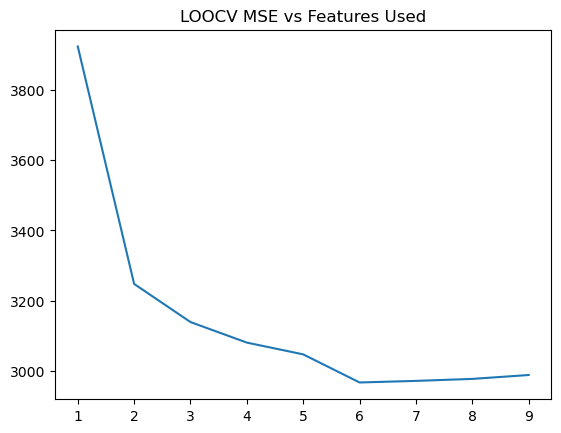

In [98]:
fig, ax = plt.subplots()
ax.plot(forward_results[:, 0], forward_results[:, 1])
ax.set_title("LOOCV MSE vs Features Used")
plt.show()

In [84]:
forward_sel2 = sfs(linreg, k_features=(1,p), forward=True, floating=False, scoring='neg_mean_squared_error', cv=n, n_jobs=-1)
# print('best combination (ACC: %.3f): %s\n' % (forward_sel2.k_score_, forward_sel2.k_feature_idx_))

forward_sel2 = forward_sel2.fit(X, Y)
forward_sel2.subsets_['avg_score']

# print('all subsets:\n', forward_sel2.subsets_)

{1: {'feature_idx': (2,),
  'cv_scores': array([-3.60896031e+03, -8.06656861e+02, -2.86910819e+03, -4.22904445e+03,
         -3.05343916e+02, -2.74240761e+02, -9.47572668e+02, -7.66201492e+03,
         -1.02667487e+04, -1.46988512e+04, -8.23904666e+02, -1.00022266e+04,
         -2.96116759e+03, -1.20715580e+03, -9.70313120e+01, -1.30382966e+03,
         -6.96820250e+02, -3.87502231e+02, -2.04805802e+03, -1.09566265e+03,
         -9.18830873e+02, -6.74345367e+03, -6.47563657e+03, -1.26196758e+03,
         -4.65775991e+00, -3.85006493e+03, -3.45531399e+03, -1.54718238e+04,
         -8.41705667e-01, -1.87893004e+04, -4.30534576e+03, -9.71149638e+02,
         -5.06845548e+03, -3.01679301e+02, -7.38547742e+02, -4.31479740e+02,
         -8.35101255e+03, -1.29178352e+04, -1.04445340e+03, -5.75646713e+03,
         -1.96231509e+03, -1.09820005e+03, -6.61637589e+03, -1.44211041e+03,
         -1.80143466e+03, -4.33529161e+03, -2.40028087e+03, -3.55898254e+03,
         -1.41547383e+03, -5.63721917

In [105]:
back_results = []
for i in range(1, p):
    back_sel = sfs(linreg, k_features=i, forward=False, floating=False, scoring='neg_mean_squared_error', cv=n, n_jobs=-1)
    back_sel = back_sel.fit(X, Y)
    print('Selected features:', back_sel.k_feature_idx_)
    print("LOOCV MSE :", back_sel.subsets_[i]['avg_score'])

    loocv_mse = - back_sel.subsets_[i]['avg_score']

    X_subs = back_sel.transform(X)
    linreg.fit(X_subs, Y)

    subs_preds = linreg.predict(X_subs)

    RSS = np.sum((subs_preds - Y)**2)
    TSS = np.sum((Y - Y.mean())**2)
    R_sq = (TSS - RSS) / TSS
    n = Y.shape[0]
    p_subs = X_subs.shape[1]
    adjr2 = 1 - (1 - R_sq) * (n - 1) / (n - p_subs - 1)
    print(adjr2)
    back_results.append([i, loocv_mse, R_sq, adjr2])

Selected features: (2,)
LOOCV MSE : -3922.988547037691
0.34243267786225595
Selected features: (2, 8)
LOOCV MSE : -3247.9789202857637
0.45702279799753176
Selected features: (2, 3, 8)
LOOCV MSE : -3139.5618042298206
0.476521351221309
Selected features: (2, 3, 4, 8)
LOOCV MSE : -3081.178878361809
0.4873659896205007
Selected features: (1, 2, 3, 4, 8)
LOOCV MSE : -3047.7045267378335
0.49412469986682905
Selected features: (1, 2, 3, 4, 5, 8)
LOOCV MSE : -2967.821415170814
0.508192537938412
Selected features: (1, 2, 3, 4, 5, 8, 9)
LOOCV MSE : -2972.340123617732
0.5084288841144622
Selected features: (1, 2, 3, 4, 5, 7, 8, 9)
LOOCV MSE : -2977.9834051421776
0.5085552663698191
Selected features: (1, 2, 3, 4, 5, 6, 7, 8, 9)
LOOCV MSE : -2989.060298113329
0.5076694558706669


In [106]:
back_results = np.array(back_results)
back_results

array([[1.00000000e+00, 3.92298855e+03, 3.43923760e-01, 3.42432678e-01],
       [2.00000000e+00, 3.24797892e+03, 4.59485280e-01, 4.57022798e-01],
       [3.00000000e+00, 3.13956180e+03, 4.80082430e-01, 4.76521351e-01],
       [4.00000000e+00, 3.08117888e+03, 4.92015731e-01, 4.87365990e-01],
       [5.00000000e+00, 3.04770453e+03, 4.99860247e-01, 4.94124700e-01],
       [6.00000000e+00, 2.96782142e+03, 5.14883796e-01, 5.08192538e-01],
       [7.00000000e+00, 2.97234012e+03, 5.16231600e-01, 5.08428884e-01],
       [8.00000000e+00, 2.97798341e+03, 5.17470364e-01, 5.08555266e-01],
       [9.00000000e+00, 2.98906030e+03, 5.17717018e-01, 5.07669456e-01]])

In [ ]:
for i in range(p - 1):
    print(i)
    print(forward_results[i])
    print(back_results[i])

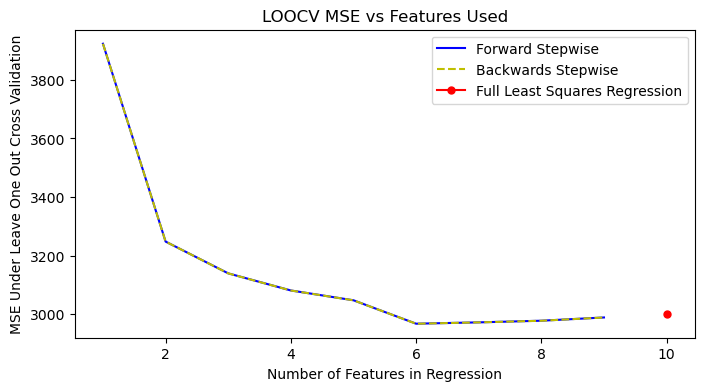

In [135]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(forward_results[:, 0], forward_results[:, 1] + .1 , 'b', label="Forward Stepwise")
ax.plot(back_results[:, 0], back_results[:, 1], 'y', linestyle='--', label="Backwards Stepwise")
ax.plot(10, 3001.7528469994304, marker='o', markersize=5, color='red', label="Full Least Squares Regression")
ax.set_xlabel("Number of Features in Regression")
ax.set_ylabel("MSE Under Leave One Out Cross Validation")

ax.legend()
ax.set_title("LOOCV MSE vs Features Used")
fig.savefig('proj_MSE.png', dpi=1200)

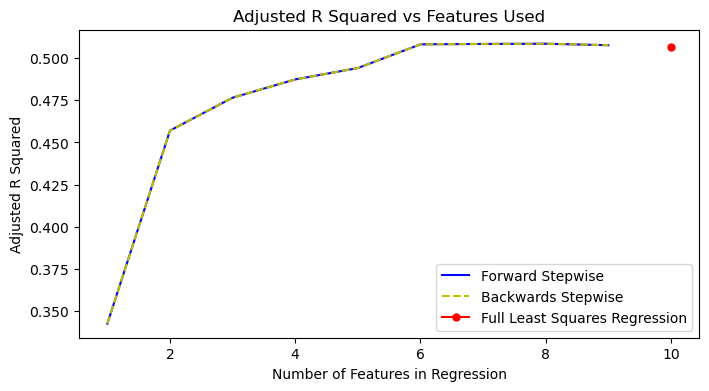

In [134]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(forward_results[:, 0], forward_results[:, 3], 'b', label="Forward Stepwise")
ax.plot(back_results[:, 0], back_results[:, 3], 'y', linestyle='--', label="Backwards Stepwise")
ax.plot(10, 0.5065592904853231, marker='o', markersize=5, color='red', label="Full Least Squares Regression")
ax.set_xlabel("Number of Features in Regression")
ax.set_ylabel("Adjusted R Squared")

ax.legend()
ax.set_title("Adjusted R Squared vs Features Used")
fig.savefig('proj_adjr2.png', dpi=1200)